In [1]:
from __future__ import print_function

from statsmodels.compat import lzip
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.api as sm
from statsmodels.formula.api import ols

import warnings
warnings.filterwarnings('ignore')

### Load data
Duncan's Prestige Dataset 

In [2]:
prestige = sm.datasets.get_rdataset("Duncan", "carData", cache=True).data
prestige.head()

,type,income,education,prestige
accountant,prof,62,86,82
pilot,prof,72,76,83
architect,prof,75,92,90
author,prof,55,90,76
chemist,prof,64,86,90


In [3]:
prestige.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45 entries, accountant to waiter
Data columns (total 4 columns):
type         45 non-null object
income       45 non-null int64
education    45 non-null int64
prestige     45 non-null int64
dtypes: int64(3), object(1)
memory usage: 1.8+ KB


In [4]:
# fit model
prestige_model = ols("prestige ~ income + education", data=prestige).fit()

In [5]:
print(prestige_model.summary())

                            OLS Regression Results                            
Dep. Variable:               prestige   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     101.2
Date:                Thu, 05 Sep 2019   Prob (F-statistic):           8.65e-17
Time:                        22:40:38   Log-Likelihood:                -178.98
No. Observations:                  45   AIC:                             364.0
Df Residuals:                      42   BIC:                             369.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.0647      4.272     -1.420      0.1

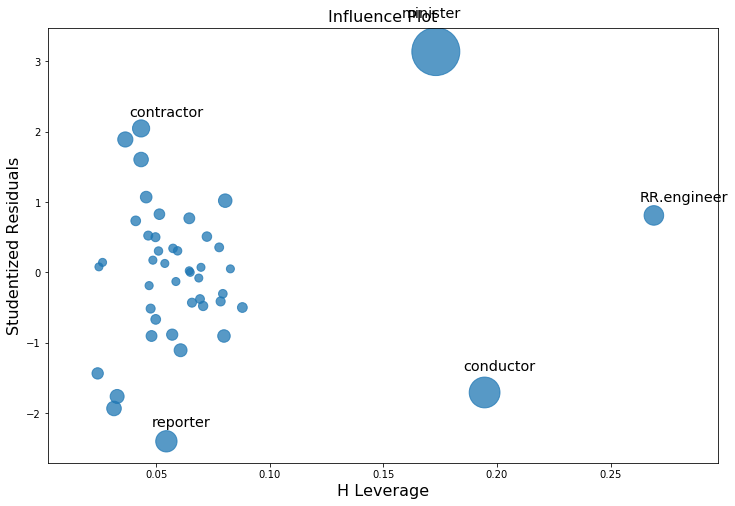

In [6]:
# influence plot
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(prestige_model, ax=ax, criterion="cooks")
plt.show()

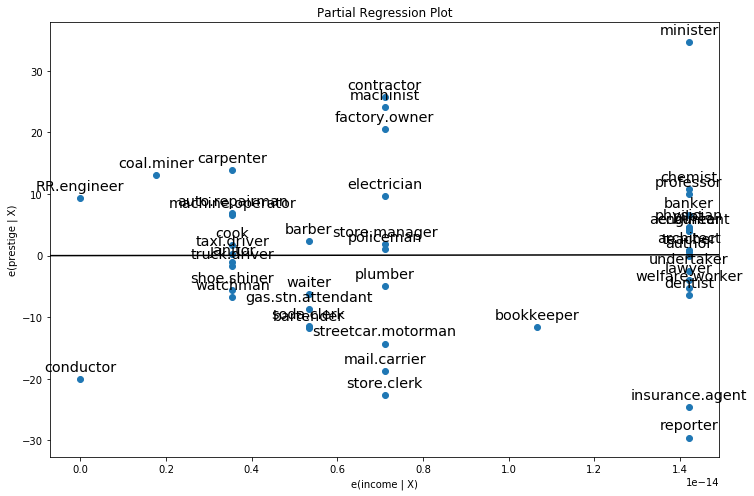

In [7]:
# Partial Regression Plots
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.plot_partregress("prestige", "income", ["income", "education"], data=prestige, ax=ax)

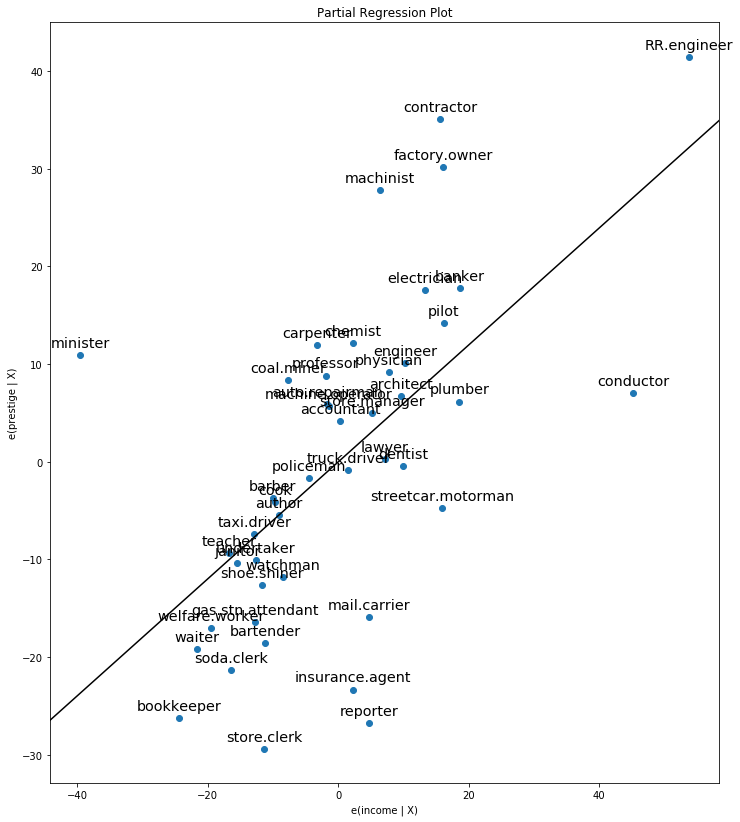

In [8]:
fix, ax = plt.subplots(figsize=(12,14))
fig = sm.graphics.plot_partregress("prestige", "income", ["education"], data=prestige, ax=ax)

In [9]:
subset = ~prestige.index.isin(["conductor", "RR.engineer", "minister"])
prestige_model2 = ols("prestige ~ income + education", data=prestige, subset=subset).fit()
print(prestige_model2.summary())

                            OLS Regression Results                            
Dep. Variable:               prestige   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     138.1
Date:                Thu, 05 Sep 2019   Prob (F-statistic):           2.02e-18
Time:                        22:40:40   Log-Likelihood:                -160.59
No. Observations:                  42   AIC:                             327.2
Df Residuals:                      39   BIC:                             332.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.3174      3.680     -1.717      0.0

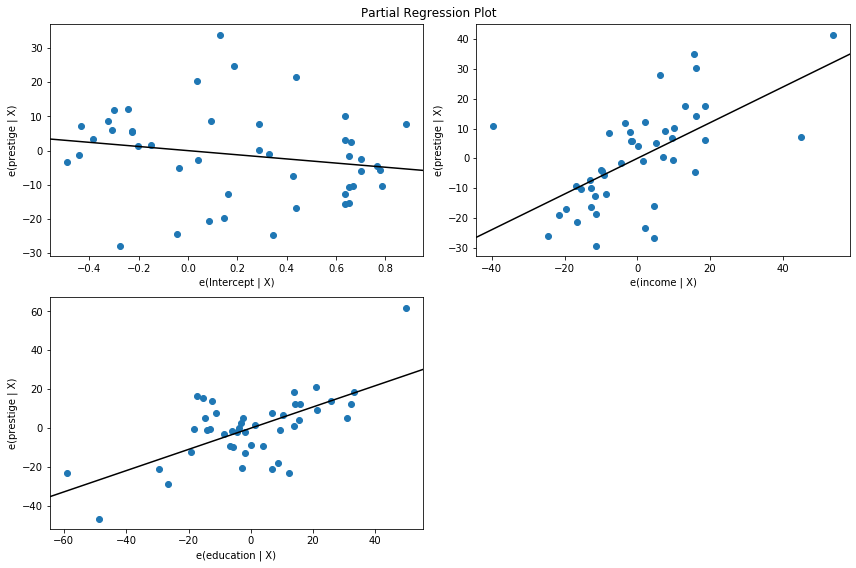

In [10]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(prestige_model, fig=fig)

### Component-Component plus Residual (CCPR) Plots

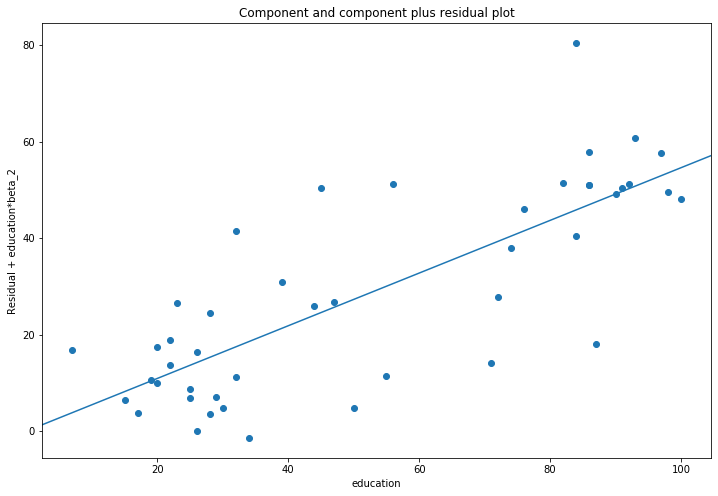

In [11]:
fig, ax = plt.subplots(figsize=(12, 8))
fig = sm.graphics.plot_ccpr(prestige_model, "education", ax=ax)

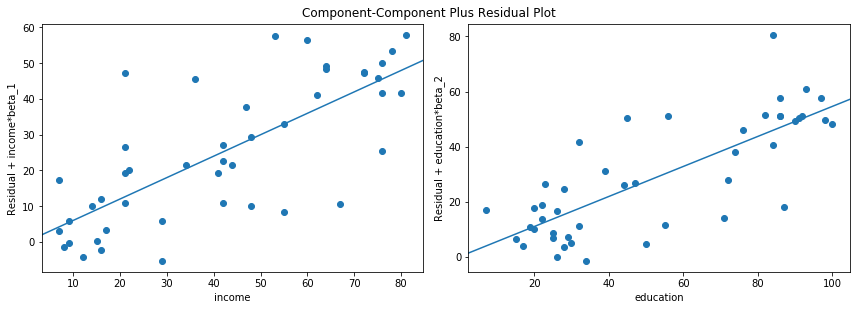

In [12]:
fig = plt.figure(figsize=(12, 8))
fig = sm.graphics.plot_ccpr_grid(prestige_model, fig=fig)

### Regression Plots

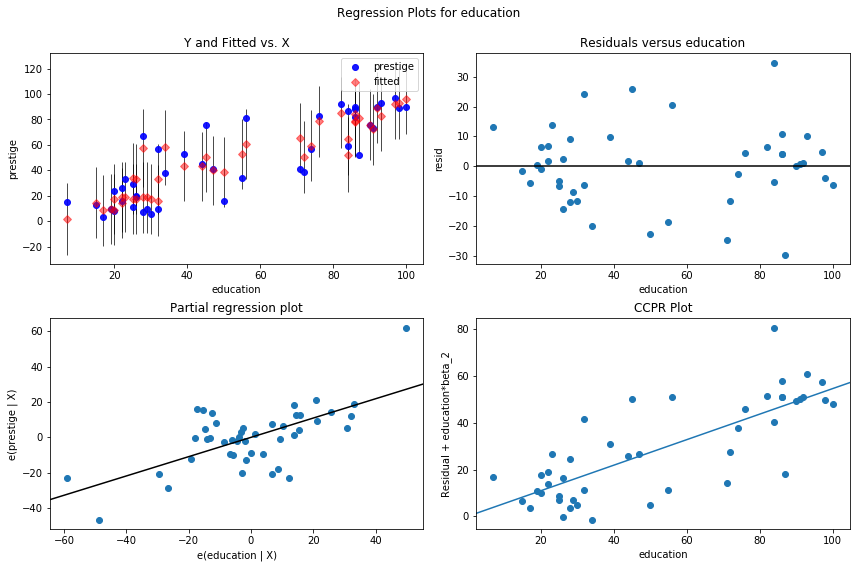

In [13]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(prestige_model, "education", fig=fig)

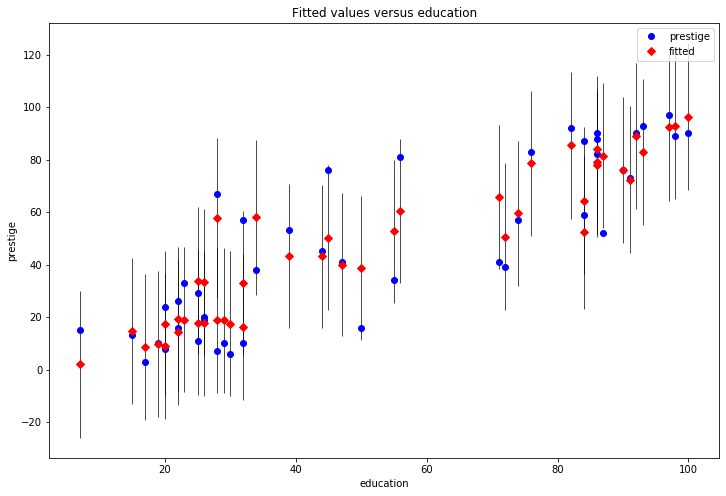

In [14]:
# fit plot
fig, ax = plt.subplots(figsize=(12, 8))
fig = sm.graphics.plot_fit(prestige_model, "education", ax=ax)

### Statewide Crime 2009 Data

In [15]:
dta = sm.datasets.statecrime.load_pandas().data
dta.head()

,violent,murder,hs_grad,poverty,single,white,urban
state,,,,,,,
Alabama,459.9,7.1,82.1,17.5,29.0,70.0,48.65
Alaska,632.6,3.2,91.4,9.0,25.5,68.3,44.46
Arizona,423.2,5.5,84.2,16.5,25.7,80.0,80.07
Arkansas,530.3,6.3,82.4,18.8,26.3,78.4,39.54
California,473.4,5.4,80.6,14.2,27.8,62.7,89.73


In [16]:
crime_model = ols("murder ~ urban + poverty + hs_grad + single", data=dta).fit()
print(crime_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 murder   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     50.08
Date:                Thu, 05 Sep 2019   Prob (F-statistic):           3.42e-16
Time:                        22:40:44   Log-Likelihood:                -95.050
No. Observations:                  51   AIC:                             200.1
Df Residuals:                      46   BIC:                             209.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -44.1024     12.086     -3.649      0.0

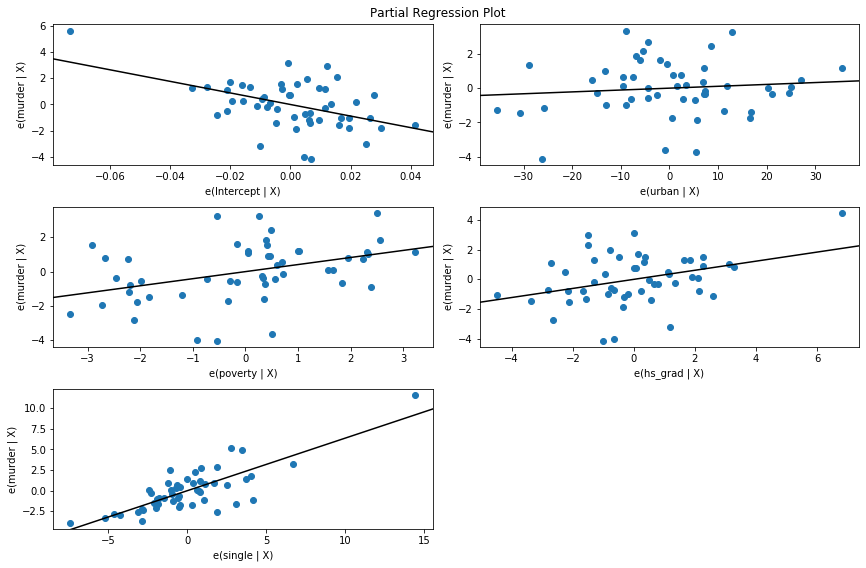

In [17]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(crime_model, fig=fig)

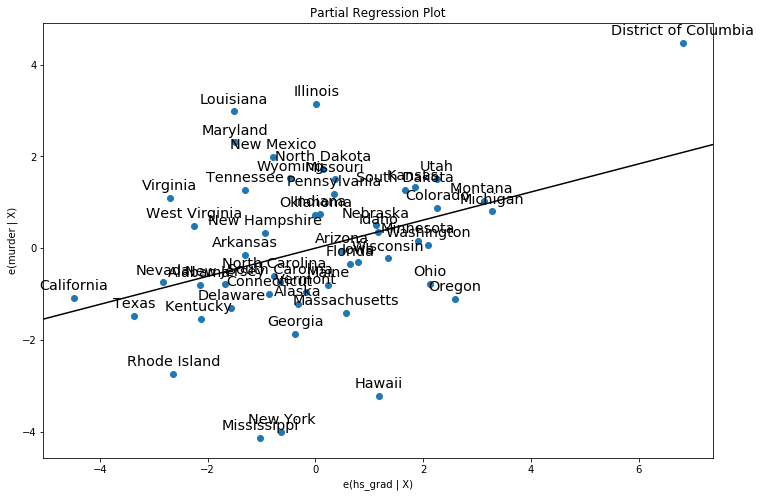

In [18]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.plot_partregress("murder", "hs_grad", ["urban", "poverty","single"], ax=ax, data=dta)

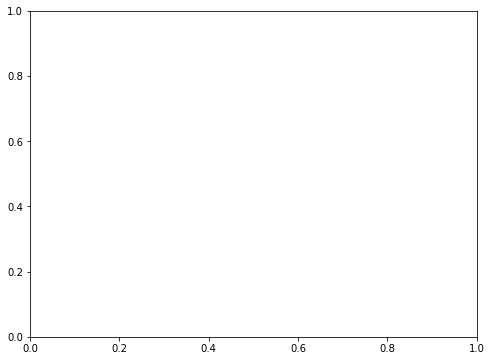

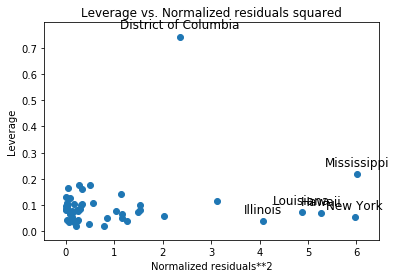

In [19]:
# Leverage-Resid2 Plot
fig, ax = plt.subplots(figsize=(8,6))
fig = sm.graphics.plot_leverage_resid2(crime_model, ax=ax)
plt.show()                                       

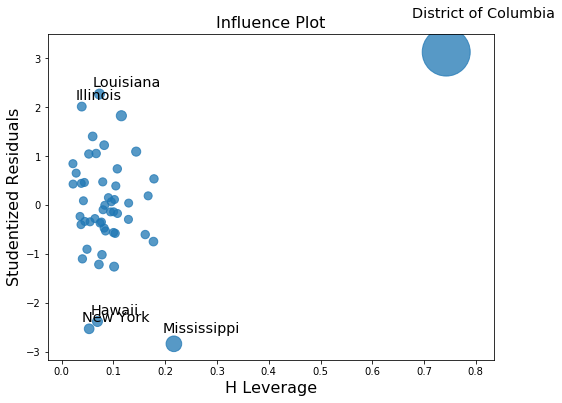

In [20]:
fig, ax = plt.subplots(figsize=(8,6))
fig = sm.graphics.influence_plot(crime_model, ax=ax)

### robust regression to correct for outliers

In [21]:
from statsmodels.formula.api import rlm

In [22]:
rob_crime_model = rlm("murder ~ urban + poverty + hs_grad + single", data=dta, M=sm.robust.norms.TukeyBiweight(3)).fit(conv="weights")
print(rob_crime_model.summary())

                    Robust linear Model Regression Results                    
Dep. Variable:                 murder   No. Observations:                   51
Model:                            RLM   Df Residuals:                       46
Method:                          IRLS   Df Model:                            4
Norm:                   TukeyBiweight                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Thu, 05 Sep 2019                                         
Time:                        22:40:48                                         
No. Iterations:                    50                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.2986      9.494     -0.453      0.6

In [23]:
weights = rob_crime_model.weights
idx = weights > 0
X = rob_crime_model.model.exog[idx.values]
ww = weights[idx] / weights[idx].mean()
hat_matrix_diag = ww*(X*np.linalg.pinv(X).T).sum(1)
resid = rob_crime_model.resid
resid2 = resid**2
resid2 /= resid2.sum()
nobs = int(idx.sum())
hm = hat_matrix_diag.mean()
rm = resid2.mean()

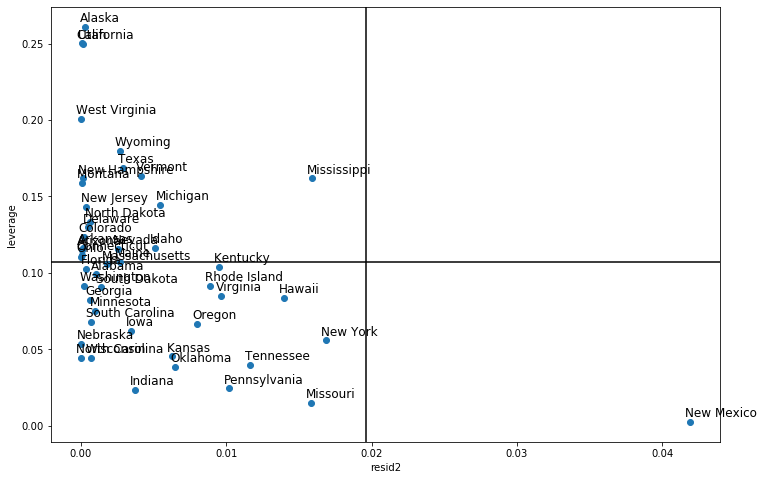

In [24]:
from statsmodels.graphics import utils
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(resid2[idx], hat_matrix_diag, 'o')
ax = utils.annotate_axes(range(nobs), labels=rob_crime_model.model.data.row_labels[idx], 
                         points=lzip(resid2[idx], hat_matrix_diag), offset_points=[(-5,5)]*nobs, size="large", ax=ax)
ax.set_xlabel("resid2")
ax.set_ylabel("leverage")
ylim = ax.get_ylim()
ax.vlines(rm, *ylim)
xlim = ax.get_xlim()
ax.hlines(hm, *xlim)
ax.margins(0,0)